## Bubble Plot of Ride Sharing Data

In [1]:
#Three observable trends based on the data:
#1.Most of Pyber's customers are in urban cities, followed by rural cities and suburban cities.
#2.Pyber gets most of the revenues from urban cities, followed by suburban cities and rural cities.
#3.A significant number of drivers are from urban cities, followed by suburban cities and rural cities.  

In [2]:
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Set the upper and lower limits of our x/y axis
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(city_data,ride_data,on="city")

# Display the data table for preview
pd.options.display.max_rows = 4000
combined_data.head(5)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
#build data for Rural
combined_data_rural = combined_data.loc[combined_data["type"]=="Rural"]
combined_data_rural
groupby_rural=combined_data_rural.groupby("city")
num_fare_rural=groupby_rural["fare"].count()
fare_sum_rural=groupby_rural["fare"].sum() 
avg_fare_rural=fare_sum_rural/num_fare_rural
ride_rural=groupby_rural["ride_id"].count() 
rural=pd.DataFrame({"ride":ride_rural, 
                    "avg_fare": avg_fare_rural})

In [5]:
#build data for Suburban
combined_data_suburban = combined_data.loc[combined_data["type"]=="Suburban"]
combined_data_suburban
groupby_suburban=combined_data_suburban.groupby("city")
num_fare_suburban=groupby_suburban["fare"].count()
fare_sum_suburban=groupby_suburban["fare"].sum() 
avg_fare_suburban=fare_sum_suburban/num_fare_suburban
ride_suburban=groupby_suburban["ride_id"].count() 
suburban=pd.DataFrame({"ride":ride_suburban, 
                    "avg_fare": avg_fare_suburban})

In [6]:
#build data for Urban
combined_data_urban = combined_data.loc[combined_data["type"]=="Urban"]
combined_data_urban
groupby_urban=combined_data_urban.groupby("city")
num_fare_urban=groupby_urban["fare"].count()
fare_sum_urban=groupby_urban["fare"].sum() 
avg_fare_urban=fare_sum_urban/num_fare_urban
num_driver_urban=groupby_urban["driver_count"].count()
driver_urban=groupby_urban["driver_count"].sum() 
ride_urban=groupby_urban["ride_id"].count() 
urban=pd.DataFrame({"ride":ride_urban, 
                    "avg_fare": avg_fare_urban})


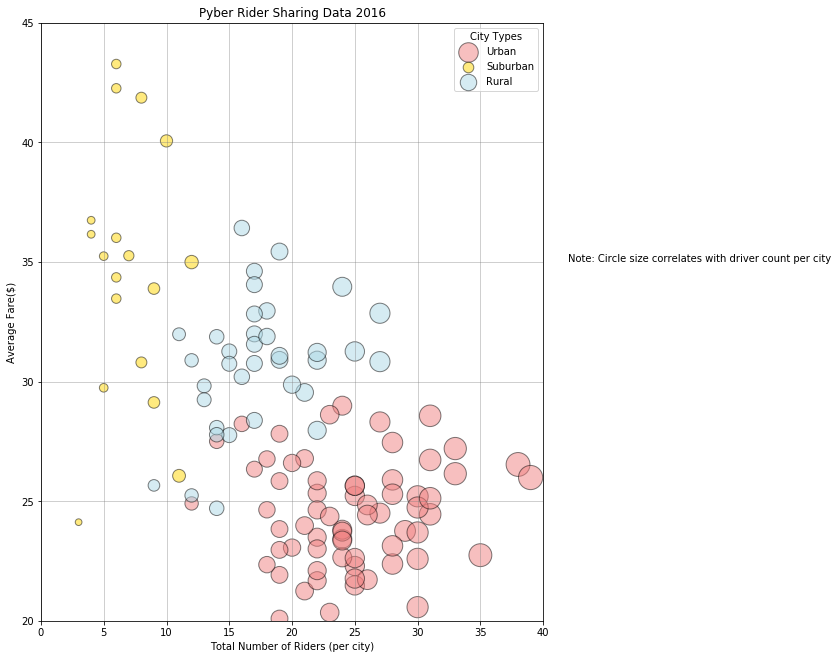

In [7]:
fig = plt.figure(figsize=(9, 11))
# plot/show urban
x=urban['ride'] 
y=urban['avg_fare'] 
plt.scatter(x, y, marker="o", facecolors="LightCoral", edgecolors="black",
             s=x*15, alpha=0.5)
# plot/show rural
x=rural['ride'] 
y=rural['avg_fare'] 
plt.scatter(x, y, marker="o", facecolors="Gold", edgecolors="black",
             s=x*15, alpha=0.5)
# plot/show suburban
x=suburban['ride'] 
y=suburban['avg_fare'] 
plt.scatter(x, y, marker="o", facecolors="LightBlue", edgecolors="black",
             s=x*15, alpha=0.5)

plt.title("Pyber Rider Sharing Data 2016")
plt.xlabel("Total Number of Riders (per city)")
plt.ylabel("Average Fare($)")
    
plt.xlim(0, 40)
plt.ylim(20, 45)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.75)
plt.legend(combined_data["type"].unique(), title="City Types")
# Incorporate a text label regarding circle size
plt.text(42,35,'Note: Circle size correlates with driver count per city',horizontalalignment='left')
# Save Figure 
#plt.tight_layout()
plt.savefig("RideSharingDataBubblePlot", bbox_inches = 'tight')
# Show plot
plt.show()


## Total Fares by City Type

In [8]:
# Calculate Type Percents
# Build Pie Chart
# Save Figure

In [9]:
# Calculate Type Percents
per_type=combined_data.groupby("type")
per_type_fare=per_type["fare"].sum()
total_fare = combined_data["fare"].sum()
cities_pct_fare = per_type["fare"].sum()/combined_data["fare"].sum()
cities_pct_fare

type
Rural       0.068115
Suburban    0.304639
Urban       0.627246
Name: fare, dtype: float64

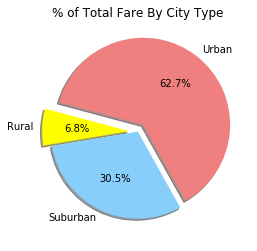

In [10]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title("% of Total Fare By City Type")
labels =["Rural","Suburban","Urban",]
colors = ["yellow","lightskyblue","lightcoral"]
explode = (0.1, 0, 0.1)
plt.pie(cities_pct_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=165)

# Save Figure 
plt.savefig("TotalFareByCityTypePie")


In [11]:
# Show Figure
plt.show()

## Total Rides by City Type

In [12]:
# Calculate Ride Percents
# Build Pie Chart
# Save Figure

In [13]:
# Calculate Ride Percents
per_type_ride=per_type["ride_id"].count()
total_ride = combined_data["ride_id"].count()
cities_pct_ride = per_type_ride/total_ride
cities_pct_ride

type
Rural       0.052632
Suburban    0.263158
Urban       0.684211
Name: ride_id, dtype: float64

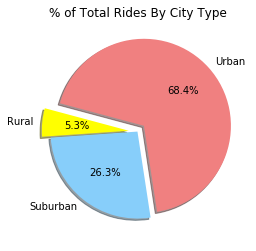

In [14]:
plt.title("% of Total Rides By City Type")
labels =["Rural","Suburban","Urban",]
colors = ["yellow","lightskyblue","lightcoral"]
explode = (0.1, 0, 0.1)
plt.pie(cities_pct_ride, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=165)

# Save Figure 
plt.savefig("TotalRideByCityTypePie")

In [15]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [16]:
# Calculate Driver Percents
# Build Pie Charts
# Save Figure

In [17]:
# Calculate Driver Percents
driver_nodup = combined_data.loc[:, ['city','driver_count','type']]

In [18]:
driver_nodup = driver_nodup.drop_duplicates(subset='city') 
driver_nodup = driver_nodup.reset_index(drop=True)
total_driver = driver_nodup['driver_count'].sum() 
driver_nodup_grouped = driver_nodup.groupby('type') 
driver_nodup_grouped=driver_nodup_grouped.sum() 
cities_pct_driver = driver_nodup_grouped/total_driver


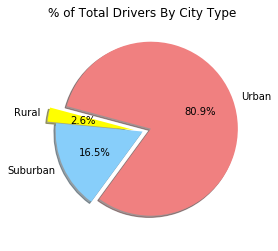

In [19]:
# Build Pie Charts
plt.title("% of Total Drivers By City Type")
labels =["Rural","Suburban","Urban",]
colors = ["yellow","lightskyblue","lightcoral"]
explode = (0.1, 0, 0.1)
plt.pie(cities_pct_driver, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=165)

# Save Figure 
plt.savefig("TotalDriverByCityTypePie")

In [20]:
# Show Figure
plt.show()